# Hierarchical Clustering


https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs

from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

## Data Ejemplo
Para mostrar algunos ejemplos con k-means necesitamos crear dataset artificiales.

In [3]:
random_state = 1234
no_clusters = 3
no_samples = 1500

x, y = make_blobs(centers=no_clusters, n_samples=no_samples, random_state=random_state)

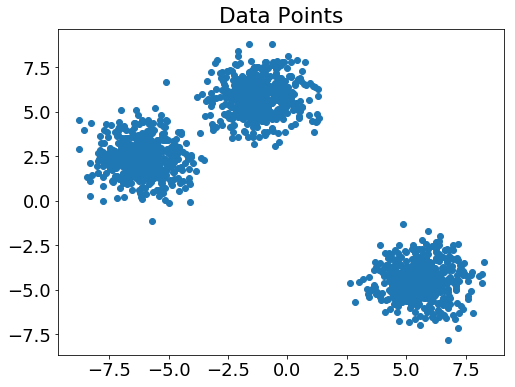

In [4]:
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(x[:,0],x[:,1], cmap=plt.get_cmap('Pastel1'));
plt.title("Data Points");

Dendrogram usando single linkage.

In [5]:
z = linkage(x, 'single')
print('z has %d rows'%(z.shape[0]))

z has 1499 rows


In [6]:
print('Fusion realizada entre %d y %d basado en distancia de %.5f '%(z[0][0],z[0][1],z[0][2]))

Fusion realizada entre 1247 y 1466 basado en distancia de 0.00100 


Grafica de Dendrograma

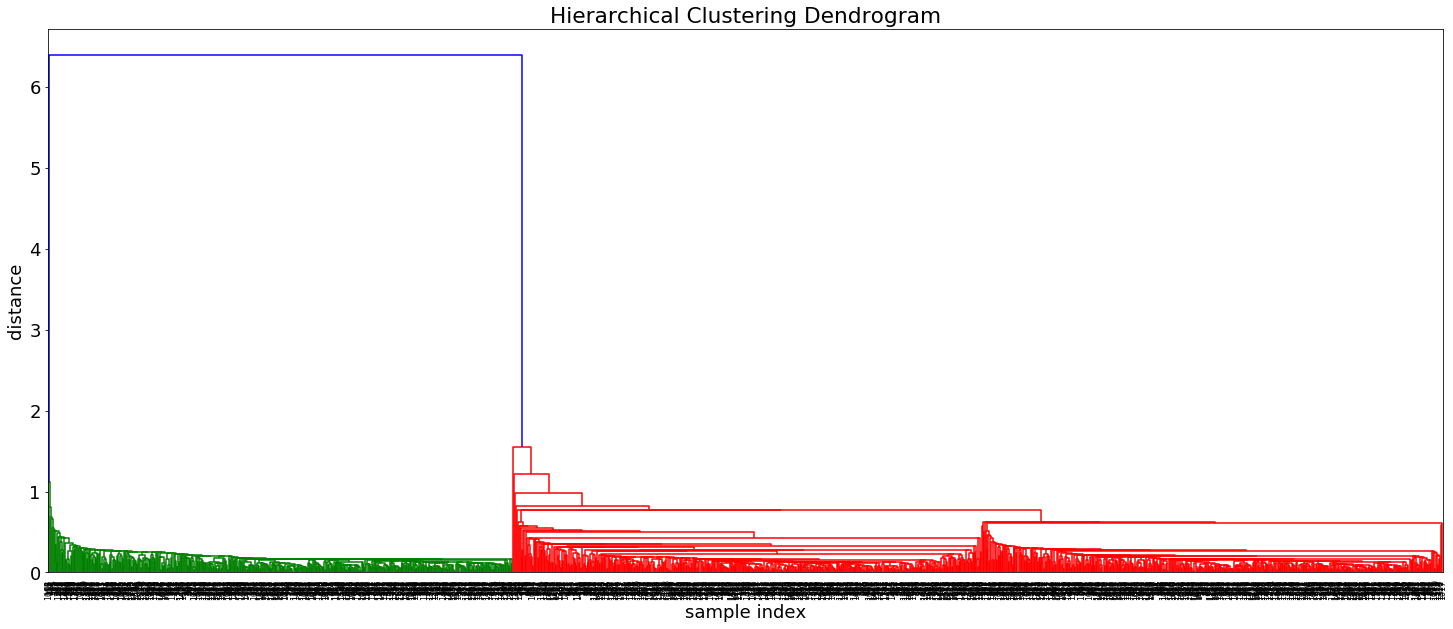

In [7]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

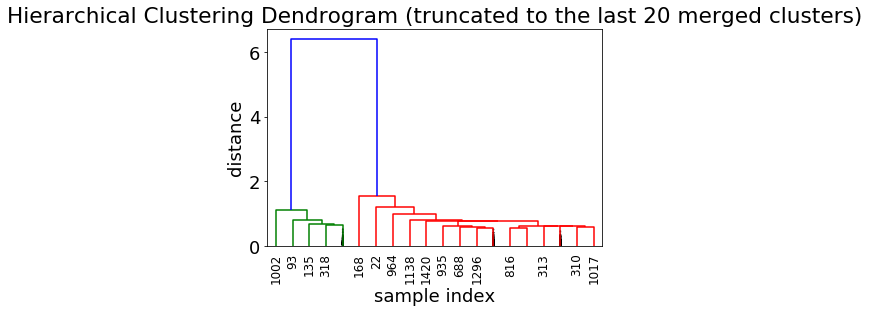

In [8]:
plt.title('Hierarchical Clustering Dendrogram (truncated to the last 20 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## Análisis de Rodilla/Codo

In [9]:
wss_values = []
bss_values = []
k_values = range(1,20)

for k in k_values:
    clustering = fcluster(z, k, criterion='maxclust')
    centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(x, centroids, 'euclidean')
    D = cdist(x, centroids, 'euclidean')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/x.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(x)**2)/x.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

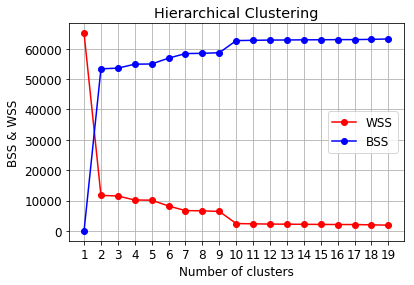

In [10]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

/Users/juanjaramillo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


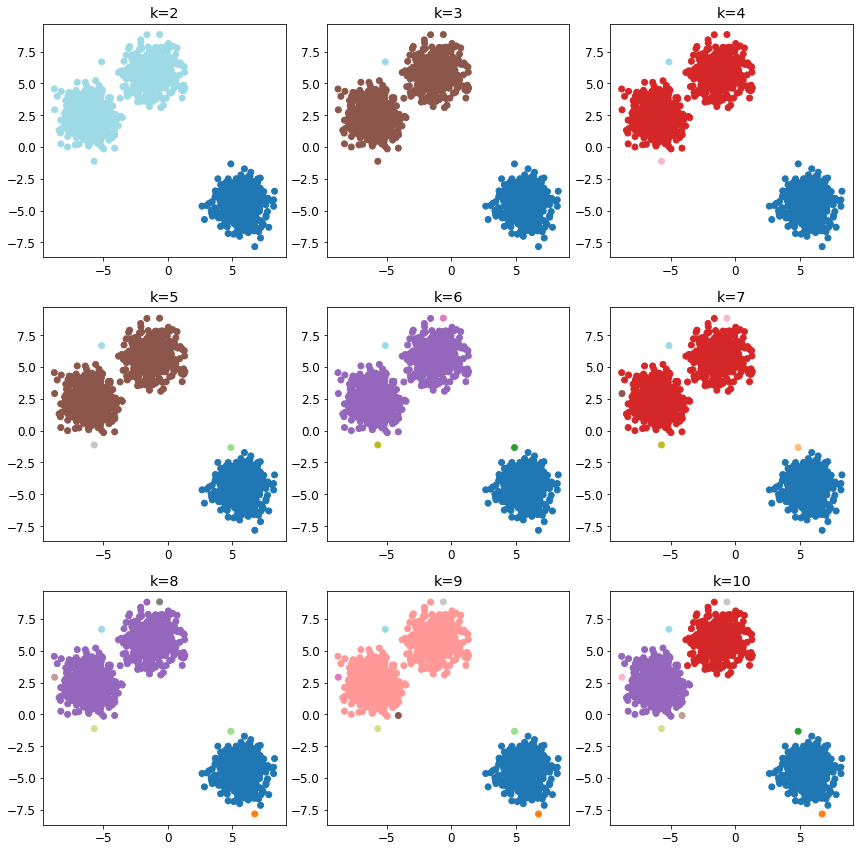

In [12]:
plt.figure(figsize=(12, 12));

for k in range(2,11):
    yp = fcluster(z, k, criterion='maxclust')

    plt.subplot(330+(k-1))
    plt.title('k='+str(k))
    plt.scatter(x[:, 0], x[:, 1], c=yp,cmap=plt.get_cmap('Vega20'))
    
plt.tight_layout()